# Medical Data Visualizer

The idea of this project is to visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. 
The dataset values were collected during medical examinations.


# Tasks:

1 The idea of this project is to analyze the correlation between different diseases, in a medical examination Data Frame. The data represent patients and the columns represent information like body measurements, results from various blood tests, 
  and lifestyle choices.
    
2 Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. 
  If the value is more than 1, make the value 1.
    
3 Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot().
  The dataset should be split by 'Cardio' so there is one chart for each cardio value.
    
4 Clean the data. Filter out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with `df['ap_lo'] <= df['ap_hi'])`)
- height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

5 Create Categorical Plots to show relationship between Age and other Columns (at least 3 plot) Add a description for each plot explaining the relationship. 
  Hint: (Seaborn has good plotting solutions)

6 Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle.

## Importing libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

print("Libraries perfectly installed")

Libraries perfectly installed


# Exploratory Data Analysis

Loading the Dataset

In [2]:
Medical_data = pd.read_csv('medical_examination.csv')

Medical_data.head(4)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1


## Further data exploration

In [3]:
print("The Medical dataset has: ", Medical_data.shape[0], " columns ")

print("The Medical dataset has: ", Medical_data.shape[1], " rows ")

The Medical dataset has:  70000  columns 
The Medical dataset has:  13  rows 


In [4]:
Medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Medical_data.info() command, which gives us the information about number of values present in each column,
and data types of each column. We observe that we have all the columns as ‘integer’ data types, and only ‘Weight’ column is of float type. 
Since we know what our columns signify, we know which columns we need to treat!

In [5]:
Medical_data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
Medical_data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
Medical_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

isnull().sum() check the count of NaN (null) values in our dataset, which turns out to give the above result with no missing value

In [8]:
Medical_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Task1: Calculating the BMI and Adding it to a new column in the original dataset

In [9]:

Medical_data['BMI'] = Medical_data['weight']/Medical_data['height']**2

Medical_data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.002197
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0.003493
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.002351


### making a new column and storing all the satisfied values 

In [10]:
overweight = (Medical_data["weight"]/((Medical_data["height"]/100)**2) >25).astype(int)

Medical_data["overweight"] = overweight

Medical_data.head(5)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.002197,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0.003493,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.002351,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0.002871,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.002301,0


## Task2: Normalizing the data by making 0 always good and 1 always bad. 


Replacing the value of cholesterol or gluc to 0, if it is 1. 

If the value is more than 1,we will make it 1.



### indexing the column cholesterol and gluc together 

In [11]:
Medical_data[["cholesterol", "gluc"]]

,cholesterol,gluc
0,1,1
1,3,1
2,3,1
3,1,1
4,1,1
...,...,...
69995,1,1
69996,2,2
69997,3,1
69998,1,2


Replacing the value of cholesterol or gluc to 0, if it is 1.

In [12]:
Medical_data[["cholesterol", "gluc"]]  = np.where(Medical_data[['cholesterol', 'gluc']]==1, 0,
Medical_data[['cholesterol', 'gluc']])
Medical_data[['cholesterol', 'gluc']] = np.where(Medical_data[['cholesterol', 'gluc']]>1,
1, Medical_data[['cholesterol', 'gluc']])

In [13]:
Medical_data[["cholesterol", "gluc"]]

,cholesterol,gluc
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
69995,0,0
69996,1,1
69997,1,0
69998,0,1


In [14]:
Medical_data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.002197,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,0.003493,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.002351,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,0.002871,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.002301,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,0.002938,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,0.003773,1
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,0.002998,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,0.002844,1
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,0.002528,1


## Task3: Converting the data into long format 


Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [15]:
Medical_data_cat = pd.melt(Medical_data, id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])


In [16]:
Medical_data_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


### The count plot by different diseases for two different cardio values is the following:

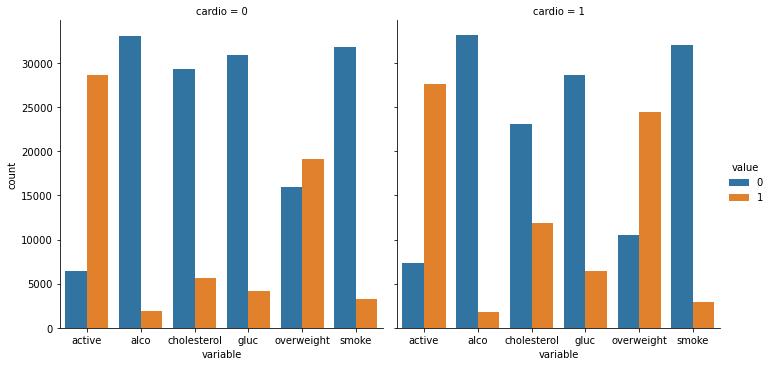

In [17]:

sns.catplot(data=Medical_data_cat, x='variable', kind='count', hue='value', col='cardio')
plt.show()

Most of the diseases are strongly correlated with heart disease (cardio). Where Cholesterol and Overweight the most dramatic cases.



## Task4: Clean the data. Filter out the patient segments that represent incorrect data:

In [18]:
# dropping the BMI column because it's no longer useful
Medical_data.drop('BMI', axis=1, inplace=True)


In [19]:
Medical_data_heat=Medical_data[(Medical_data['ap_lo']<=Medical_data['ap_hi']) &
                         (Medical_data['height']>=Medical_data['height'].quantile(0.025)) & 
                         (Medical_data['height']<=Medical_data['height'].quantile(0.975)) &
                         (Medical_data['weight']>=Medical_data['weight'].quantile(0.025)) &
                         (Medical_data['weight']<=Medical_data['weight'].quantile(0.975))]

In [20]:
corr_matrix=Medical_data_heat.corr()
corr_matrix

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


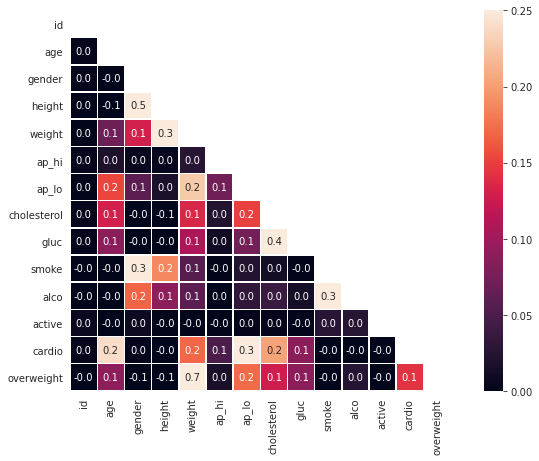

In [21]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, fig = plt.subplots(figsize=(12, 7))
    fig = sns.heatmap(corr_matrix,vmin=0,vmax=.25,square=True,annot=True,linewidths=.5,fmt=".1f",mask=mask)

The most correlated variables here are: weight - overweight, gender - smoke, cholesterol - glucosa and gender - height.

In [22]:
Medical_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


## Task 5.1: Converting the age column from days to years

In [23]:
Medical_data["age"]=Medical_data["age"]//365



In [24]:
print(Medical_data.age.unique())

len(Medical_data.age.unique())

[50 55 51 48 47 60 61 54 40 39 45 58 59 63 64 53 49 57 56 46 43 62 52 42
 44 41 29 30]


28

In [25]:
Medical_data.age.min()


29

In [26]:
Medical_data.age.max()

64

In [27]:
bins=range(25,80,10)

bins

range(25, 80, 10)

In [28]:
list(bins)

[25, 35, 45, 55, 65, 75]

### Adding a new column "age_cat" to the datasets

In [29]:
Medical_data['age_cat']=pd.cut(Medical_data.age,bins=bins,
                    labels=['25-35','35-45','45-55','55-65','65-75'])



Medical_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,age_cat
0,0,50,2,168,62.0,110,80,0,0,0,0,1,0,0,45-55
1,1,55,1,156,85.0,140,90,1,0,0,0,1,1,1,45-55
2,2,51,1,165,64.0,130,70,1,0,0,0,0,1,0,45-55
3,3,48,2,169,82.0,150,100,0,0,0,0,1,1,1,45-55
4,4,47,1,156,56.0,100,60,0,0,0,0,0,0,0,45-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,0,0,1,0,1,0,1,45-55
69996,99995,61,1,158,126.0,140,90,1,1,0,0,1,1,1,55-65
69997,99996,52,2,183,105.0,180,90,1,0,0,1,0,1,1,45-55
69998,99998,61,1,163,72.0,135,80,0,1,0,0,0,1,1,55-65


AttributeError: 'FacetGrid' object has no attribute 'figure'

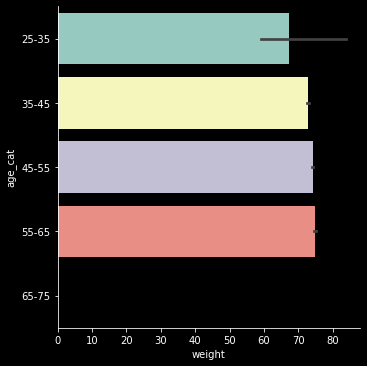

In [30]:
plt.style.use('dark_background')
g = sns.catplot(x="weight", y="age_cat", kind='bar',data=Medical_data)
g.figure.set_size_inches(90,20)
plt.xticks(rotation='vertical', size=20)
plt.yticks(size=20)
g.fig.suptitle("Categorial plot for age and weight", size=50)
g.set_axis_labels("Weight", 'Age', size=50)


plt.show()

## Categorical Plots

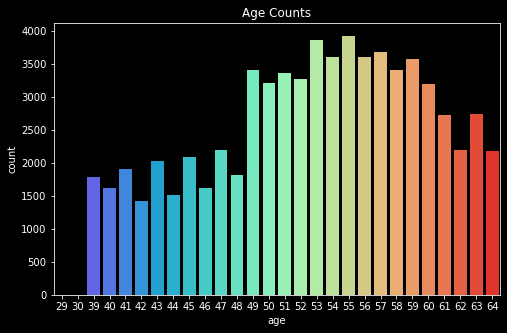

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='age',data=Medical_data, palette='rainbow')
plt.title("Age Counts")
plt.show()